# 1. Understanding and Exploring the Data

## Part A: Understanding the Data

In machine learning, the data is mainly divided into two parts: "training" and "testing". The "training" data helps to train the algorithm to be built while the "testing" data helps to make sure how well the algorithm performs. Usually, the split ratio between the two part is around 70:30. 

In this case, we can see that there are 891 entries (rows) for the testing data and 418 for the testing data. Meanwhile, there are 12 features in the training data and 11 in the testing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
all_data = [train, test]

train_rows = len(train.index)
test_rows = len(test.index)
print("There are", train_rows, "rows in the training data and", test_rows, "rows in the testing data.")

print("---" * 30)

train_columns = train.shape[1]
test_columns = test.shape[1]
print("There are", train_columns, "columns in the training data and", test_columns, "columns in the testing data.")

There are 891 rows in the training data and 418 rows in the testing data.
------------------------------------------------------------------------------------------
There are 12 columns in the training data and 11 columns in the testing data.


Through Pandas, we can get a preview of the data (in the code section). The target variable here is the "Survived" column, which describes whether the passenger is survived or not (in the testing data, we can see that the column is missing); if the value equals to 0, it means the passenger did not survive and if the value equals to 1, it means the passenger did survive.

Before we move on, here is a list of the features and their meanings, with their data types provided (in the code section):

1. PassengerId - Id
2. Survived - Survival: 0 = No; 1 = Yes
3. Pclass - Passenger Class (1 = First Class; 2 = Second Class; 3 = Third Class)
4. Name - Name
5. Sex - Gender
6. Age - Age
7. SibSp - Number of siblings/spouses aboard (travelling with the passenger)
8. Parch - Number of parents/children aboard (travelling with the passenger)
9. Ticket - Ticket number
10. Fare - Passenger fare
11. Cabin - Cabin
12. Embarked - Port of embarkation, describing the three possible areas of the Titanic from which the people embark: C = Cherbourg; Q = Queenstown; S = Southampton

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Part B: Exploring the Data

Let's see if there are any missing value in the datasets.

In [7]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending = False)
    ms = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    ms = ms[ms["Percent"] > 0]
    f, ax = plt.subplots(figsize = (8, 6))
    plt.xticks(rotation = '90')
    fig = sns.barplot(ms.index, ms["Percent"], color = 'green', alpha = 0.8)
    plt.xlabel('Features', fontsize = 15)
    plt.ylabel('Percent of Missing Values', fontsize = 15)
    plt.title('Percent Missing Data by Feature', fontsize = 15)
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


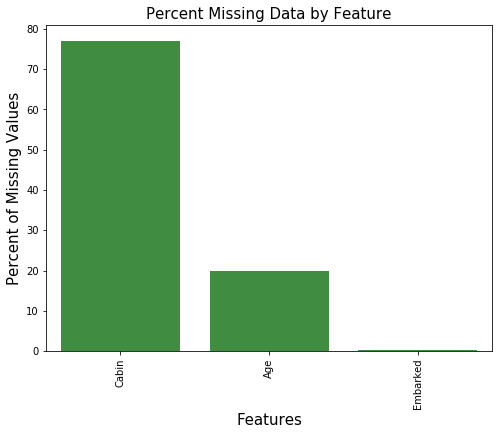

In [8]:
missingdata(train)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


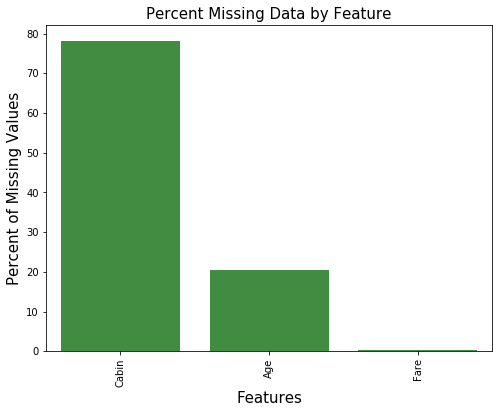

In [9]:
missingdata(test)

Since we have some missing values in the datasets, we will filling these with using the median and modes for 'Age', 'Embarked' and 'Fare', and will dropping out the 'Cabin' columns (because more than 75% of the data are missing for the column).

In [10]:
#Cabin
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

#Age
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(train['Age'].median())

#Embarked
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

#Fare
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [11]:
print('Check the missing value in the "Train" data')
print(train.isnull().sum())
print('-' * 30)
print('Check the missing value in the "Test" data')
print(test.isnull().sum())

Check the missing value in the "Train" data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
------------------------------
Check the missing value in the "Test" data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# 2. Feature Engineering

Feature engineering is fundamental and is known to be the process of using domain knowledge of the data to create features that make the machine learning algorithms work, since these algorithms tend to use some input data to create outputs where the input data comprise features, usually in the form of structured columns. It may help to prepare the proper input dataset, compatible with the model requirements and improve the performance of the models.

## Part A: Creating New Features

Before we start exploring the data, let's combine the "Train" and the "Test" datasets into one single dataset in order to make the work more easier.

In [12]:
alldata = [train, test]

Let's create a new feature named "Family Size" as a combination of the columns "SibSp" and "Parch":

In [13]:
for dataset in alldata:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

Let's make a new feature named "Title", with the titles of the passengers' names. The names without the common titles, let's name it "Uncommon":

In [14]:
import re

# Define function to extract titles from the passenger's name.
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search: #If the title exists, extract and return it.
        return title_search.group(1)
    return ""

# Create a new feature "Title", with the titles of the passengers' names.
for dataset in alldata:
    dataset['Title'] = dataset['Name'].apply(get_title)

# Group all non-common titles into one signle group "Uncommon".
for dataset in alldata:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Uncommon')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

Let's create a scale(also called "bin") for the "Age" column, diving the ages into "Children", "Teenager", "Adult" and "Elder":

In [15]:
for dataset in all_data:
    dataset['AgeScale'] = pd.cut(dataset['Age'], bins = [0, 12, 20, 40, 120], labels = ['Children', 'Teenager', 'Adult', 'Elder'])

This time, let's create a scale for the "Fare" column, diving the fares into "Low Fare", "Median Fare", "Average Fare" and "High Fare":

In [16]:
for dataset in alldata:
    dataset['FareScale'] = pd.cut(dataset['Fare'], bins = [0, 7.91, 14.45, 31, 120], labels = ['LowFare', 'MedianFare', 'AverageFare', 'HighFare'])

Just in case, for our reference, let's make a copy of the both datasets and work with the copy.

In [17]:
train_df = train
test_df = test
alldata_df = [train_df, test_df]

In [18]:
for dataset in alldata_df:
    drop_column = ['Age', 'Fare', 'Name', 'Ticket']
    dataset.drop(drop_column, axis = 1, inplace = True)

In [19]:
drop_column = ['PassengerId']
train_df.drop(drop_column, axis = 1, inplace = True)

For the last step, let's convert the categorical features into numerical by using dummy variables.

In [20]:
train_df = pd.get_dummies(train_df, columns = ['Sex', 'Title', 'AgeScale', "Embarked", "FareScale"], prefix = ['Sex', 'Title', 'AgeType', "EmbarkedType", "FareType"])
test_df = pd.get_dummies(test_df, columns = ['Sex', 'Title', 'AgeScale', "Embarked", "FareScale"], prefix = ['Sex', 'Title', 'AgeType', "EmbarkedType", "FareType"])

In [21]:
test_df.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,AgeType_Teenager,AgeType_Adult,AgeType_Elder,EmbarkedType_C,EmbarkedType_Q,EmbarkedType_S,FareType_LowFare,FareType_MedianFare,FareType_AverageFare,FareType_HighFare
0,892,3,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,893,3,1,0,2,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,894,2,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,895,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,896,3,1,1,3,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


## Part B: Correlation Between the Features

<function matplotlib.pyplot.show(*args, **kw)>

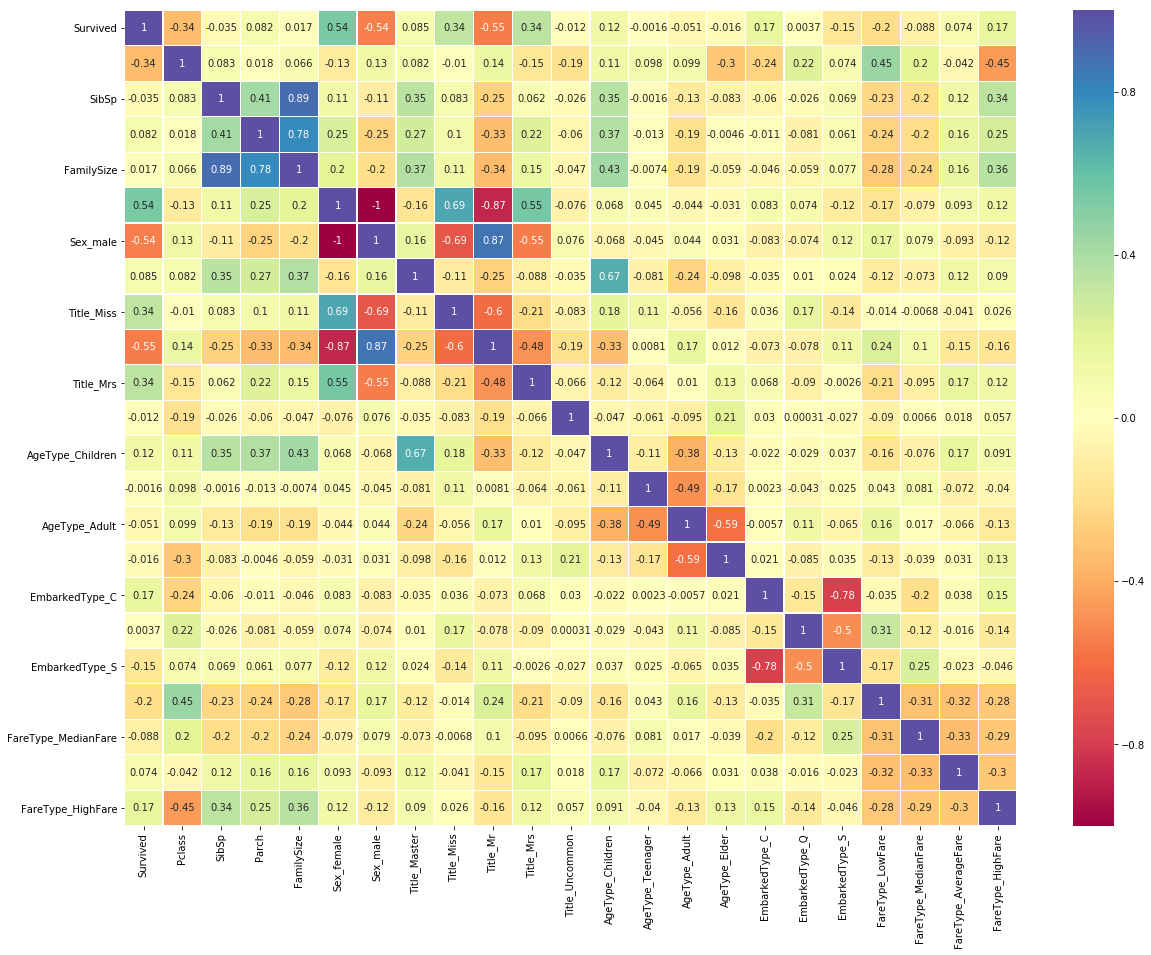

In [22]:
sns.heatmap(train_df.corr(), annot = True, cmap = 'Spectral', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.show

## Part C: Pairplots of the Features

/Users/katekim/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/katekim/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/katekim/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/katekim/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/katekim/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < 

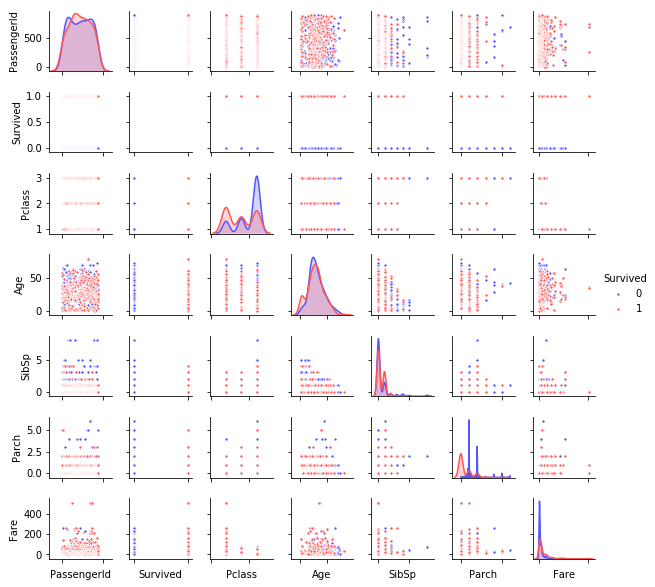

In [26]:
pairplot = sns.pairplot(data = train, hue = 'Survived', palette = 'seismic', size = 1.2, diag_kind = 'kde', diag_kws = dict(shade=True), plot_kws = dict(s = 10))
pairplot.set(xticklabels = [])

# 3. Modeling and Prediction

To predict, we need the training data and the testing data. Since we have those, now we can train our model. In order to do this, we need to split the data into two parts: X and Y. X would contain all the features while Y would contain the actual outputs, the "Survived" data.

In [27]:
from sklearn.model_selection import train_test_split #For splitting the data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold #For K-Fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [29]:
allfeatures = train_df.drop("Survived", axis = 1)
targetfeature= train_df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(allfeatures, targetfeature, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 22), (268, 22), (623,), (268,))

## Part A: Logistic Regression

Logistic regression yielded 82.66 %.
------------------------------------------------------------------------------------------
The cross validated score for logistic regression is 82.39 .


/Users/katekim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katekim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katekim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katekim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katekim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

Text(0.5, 1.05, 'Confusion Matrix')

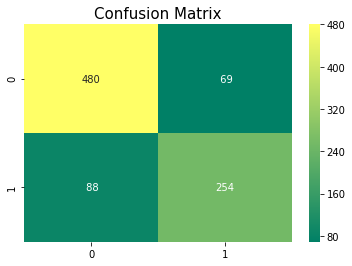

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
lrscore = model.score(X_train, y_train)
print("Logistic regression yielded", round(lrscore * 100, 2), "%.")

print("---" * 30)

kfold = KFold(n_splits = 10, random_state = 22)
result_lr = cross_val_score(model, allfeatures, targetfeature, cv=10, scoring = 'accuracy')
print("The cross validated score for logistic regression is", round(result_lr.mean()*100,2), ".")

y_pred_lr = cross_val_predict(model, allfeatures, targetfeature, cv=10)
sns.heatmap(confusion_matrix(targetfeature, y_pred_lr), annot = True, fmt = "3.0f", cmap = "summer")
plt.title('Confusion Matrix', y = 1.05, size = 15)

## Part B: K-Nearest Neighbors (KNN)

KNN yielded 84.43 %.
------------------------------------------------------------------------------------------
The cross validated score for KNN is 81.48 .


Text(0.5, 1.05, 'Confusion Matrix')

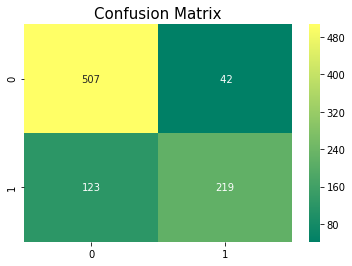

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
knnscore = model.score(X_train, y_train)
print("KNN yielded", round(knnscore * 100, 2), "%.")

print("---" * 30)

kfold = KFold(n_splits = 10, random_state = 22)
result_knn = cross_val_score(model, allfeatures, targetfeature, cv = 10, scoring = 'accuracy')
print("The cross validated score for KNN is", round(result_knn.mean()*100,2), ".")

y_pred_knn = cross_val_predict(model, allfeatures, targetfeature, cv=10)
sns.heatmap(confusion_matrix(targetfeature, y_pred_knn), annot = True, fmt = "3.0f", cmap = "summer")
plt.title('Confusion Matrix', y = 1.05, size = 15)

## Part C: Random Forest

Random Forest yielded 90.05 %.
------------------------------------------------------------------------------------------
The cross validated score for Random Forest is 81.71 .


Text(0.5, 1.05, 'Confusion Matrix')

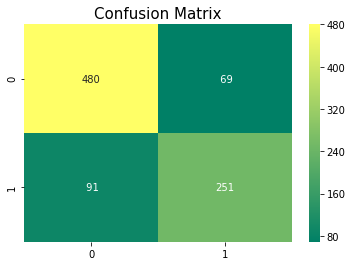

In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
rfscore = model.score(X_train, y_train)
print("Random Forest yielded", round(rfscore * 100, 2), "%.")

print("---" * 30)

kfold = KFold(n_splits = 10, random_state = 22)
result_rf = cross_val_score(model, allfeatures, targetfeature, cv = 10, scoring = 'accuracy')
print("The cross validated score for Random Forest is", round(result_rf.mean()*100,2), ".")

y_pred_rf = cross_val_predict(model, allfeatures, targetfeature, cv=10)
sns.heatmap(confusion_matrix(targetfeature, y_pred_rf), annot = True, fmt = "3.0f", cmap = "summer")
plt.title('Confusion Matrix', y = 1.05, size = 15)

## Part D: Model Evaluation

In [99]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest'],
    'Score': [result_lr.mean(), result_knn.mean(), result_rf.mean()]
    })
models.sort_values(by = 'Score',ascending = False)

,Model,Score
0,Logistic Regression,0.823880
2,Random Forest,0.817125
1,KNN,0.814840


In [100]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

train_X = train_df.drop("Survived", axis=1)
train_Y=train_df["Survived"]
test_X  = test_df.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

model = RandomForestClassifier()
n_estim=range(100,1000,100)

# Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}

model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_X,train_Y)

# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   13.4s finished


0.8249158249158249


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
model_rf.best_score_

0.8249158249158249

Important features
____________________________________________________________
89.11


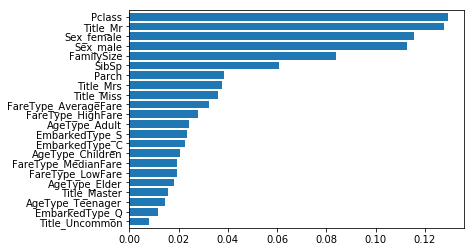

In [102]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

In [103]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rf})

In [104]:
submission.to_csv('Titanic_191229.csv',index=False)